### 计算过程:输入一个字母，预测下一个字母

    独热码编码abcde
    10000 a 
    01000 b 
    00100 c 
    00010 d 
    00001 e
    
    随机生成Why、Whh、Wxh三个参数矩阵
    
     
    Why                    yt[0.0,0.1,0.4,-0.7,0.1]  //yt[0.0,0.1,0.4,-0.7,0.1]→yt[0.02  0.02  0.91 0.03  0.02 ]=c     
    [[-1.7  0.7  -1.7  1.7  0.7]        ⬆
     [-1.6  -1.6  0.7  1.3  1.4]        ⬆by[0.0  0.1  0.4  -0.7  0.1]
     [-1.4  1.9  1.2  1.7  -1.9 ]]       
                              ⬆
                              ⬆
    Whh                         
    [[-0.9 -0.2  -0.4]          ht[0.0  0.0  0.0]     //ht[0.0  0.0  0.0]→ht[-0.9  0.8  0.7]
     [-0.3  0.9   0.2]              
     [ 0.4  0.3  -0.9]]              ⬆
                              ⬆bh[0.5  0.3  -0.2]
    
                              ⬆
    Wxh                     xt[0,1,0,0,0]      //b
    [[ 0.5-1.7  1.7 ]               
     [-2.3 0.8  1.1 ]
     [ 1.3 1.7  1.4 ]
     [ 0.3 0.8 -1.1 ]
     [-1.8 -2.0-1.0 ]]

    ht = tanh( Xt * Wxh + ht~ * Whh + bh )
      = tanh([-2.3   0.8  1.1 ] + 0 + [ 0.5  0.3  -0.2]）
      = tanh[-1.8  1.1  0.9 ]
      = [-0.9  0.8  0.7]

    yt = softmax( ht * Why + by )
      = softmax([-0.7  -0.6  2.9  0.7  -0.8] + [ 0.0  0.1  0.4  -0.7  0.1]) 
      = softmax([-0.7  -0.5  3.3  0.0  -0.7]) 
      = [0.02  0.02  0.91 0.03  0.02 ]
    


-------------load the model-----------------
Train on 5 samples
Epoch 1/100
5/5 [==============================] - 2s 363ms/sample - loss: 0.0835 - sparse_categorical_accuracy: 1.0000
Epoch 2/100
5/5 [==============================] - 0s 11ms/sample - loss: 0.0826 - sparse_categorical_accuracy: 1.0000
Epoch 3/100
5/5 [==============================] - 0s 11ms/sample - loss: 0.0818 - sparse_categorical_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - 0s 11ms/sample - loss: 0.0810 - sparse_categorical_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 0s 11ms/sample - loss: 0.0802 - sparse_categorical_accuracy: 1.0000
Epoch 6/100
5/5 [==============================] - 0s 12ms/sample - loss: 0.0795 - sparse_categorical_accuracy: 1.0000
Epoch 7/100
5/5 [==============================] - 0s 11ms/sample - loss: 0.0787 - sparse_categorical_accuracy: 1.0000
Epoch 8/100
5/5 [==============================] - 0s 12ms/sample - loss: 0.0780 - sparse_categorical_

Epoch 69/100
5/5 [==============================] - 0s 15ms/sample - loss: 0.0484 - sparse_categorical_accuracy: 1.0000
Epoch 70/100
5/5 [==============================] - 0s 14ms/sample - loss: 0.0481 - sparse_categorical_accuracy: 1.0000
Epoch 71/100
5/5 [==============================] - 0s 15ms/sample - loss: 0.0477 - sparse_categorical_accuracy: 1.0000
Epoch 72/100
5/5 [==============================] - 0s 16ms/sample - loss: 0.0474 - sparse_categorical_accuracy: 1.0000
Epoch 73/100
5/5 [==============================] - 0s 18ms/sample - loss: 0.0471 - sparse_categorical_accuracy: 1.0000
Epoch 74/100
5/5 [==============================] - 0s 14ms/sample - loss: 0.0468 - sparse_categorical_accuracy: 1.0000
Epoch 75/100
5/5 [==============================] - 0s 14ms/sample - loss: 0.0465 - sparse_categorical_accuracy: 1.0000
Epoch 76/100
5/5 [==============================] - 0s 18ms/sample - loss: 0.0462 - sparse_categorical_accuracy: 1.0000
Epoch 77/100
5/5 [======================

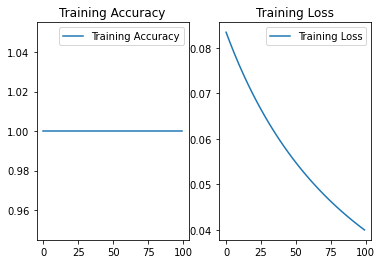

input the number of test alphabet:5
input test alphabet:e
e->a
input test alphabet:a
a->b
input test alphabet:c
c->d
input test alphabet:d
d->e
input test alphabet:c
c->d


In [3]:
# 用RNN实现输入一个字母，预测下一个字母 （One hot 编码）
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
import os

input_word = "abcde"
w_to_id = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}  # 单词映射到数值id的词典
id_to_onehot = {0: [1., 0., 0., 0., 0.], 1: [0., 1., 0., 0., 0.], 2: [0., 0., 1., 0., 0.], 3: [0., 0., 0., 1., 0.],
                4: [0., 0., 0., 0., 1.]}  # id编码为one-hot

x_train = [id_to_onehot[w_to_id['a']], id_to_onehot[w_to_id['b']], id_to_onehot[w_to_id['c']],
           id_to_onehot[w_to_id['d']], id_to_onehot[w_to_id['e']]]
y_train = [w_to_id['b'], w_to_id['c'], w_to_id['d'], w_to_id['e'], w_to_id['a']]

np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)

# 使x_train符合SimpleRNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。
# 此处整个数据集送入，送入样本数为len(x_train)；输入1个字母出结果，循环核时间展开步数为1; 表示为独热码有5个输入特征，每个时间步输入特征个数为5
x_train = np.reshape(x_train, (len(x_train), 1, 5))
y_train = np.array(y_train)

model = tf.keras.Sequential([
    SimpleRNN(3),#三个记忆体，个数越多，记忆力越好，占用资源越多
    Dense(5, activation='softmax')#映射到独热码编码，找到最大概率的字母
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/rnn_onehot_1pre1.ckpt"

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='loss')  # 由于fit没有给出测试集，不计算测试集准确率，根据loss，保存最优模型

history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[cp_callback])

model.summary()

# print(model.trainable_variables)
file = open('./weights.txt', 'w')  # 参数提取
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

############### predict #############

preNum = int(input("input the number of test alphabet:"))
for i in range(preNum):
    alphabet1 = input("input test alphabet:")
    alphabet = [id_to_onehot[w_to_id[alphabet1]]]
    # 使alphabet符合SimpleRNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。
    # 此处验证效果送入了1个样本，送入样本数为1；输入1个字母出结果，所以循环核时间展开步数为1; 表示为独热码有5个输入特征，每个时间步输入特征个数为5
    alphabet = np.reshape(alphabet, (1, 1, 5))
    result = model.predict([alphabet])
    pred = tf.argmax(result, axis=1)
    pred = int(pred)
    tf.print(alphabet1 + '->' + input_word[pred])

### 计算过程:输入4个字母，预测下一个字母
                                          yt[0.71  0.14  0.10  0.05  0.00]    # out:a
                                          
                                                   ⬆by [-0.3  0.2  0.1  0.1  -0.3]
                                          Why 
                                          [[-1.3  0.5  -0.7  -0.2  0.8]
                                          [-1.4 -0.8  -1.2   0.9  1.4]
                                          [ 0.7  1.1  -1.2   1.3 -1.1]]
                  Whh 
                  [[-0.9   -0.9   -0.9] 
                  [ 0.5    0.9   -0.3] 
                  [ 1.0    0.3   -1.5]]                  ⬆
    ht[-0.9,0.2,0.2] →                 →[···]→···→[-1.0,-1.0,0.8]
    
    ⬆bh[0.2,0.0,-0.1]
    
    Wxh
    [[ 1.2  -1.3   1.1]
    [-1.5   0.2   0.3]
    [-0.3   1.7   0.7]
    [-0.1   0.1  -0.1]
    [-1.2  -1.5   0.3]]

    ⬆                   ⬆             ⬆             ⬆ 
    xt[0,1,0,0,0] #in:b  xt[0,0,1,0,0] #in:c  xt[0,0,0,1,0] #in:d  xt[0,0,0,0,1] #in:e

-------------load the model-----------------
Train on 5 samples
Epoch 1/100
5/5 [==============================] - 2s 359ms/sample - loss: 0.5665 - sparse_categorical_accuracy: 1.0000
Epoch 2/100
5/5 [==============================] - 0s 13ms/sample - loss: 0.5552 - sparse_categorical_accuracy: 1.0000
Epoch 3/100
5/5 [==============================] - 0s 13ms/sample - loss: 0.5441 - sparse_categorical_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - 0s 12ms/sample - loss: 0.5333 - sparse_categorical_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 0s 12ms/sample - loss: 0.5226 - sparse_categorical_accuracy: 1.0000
Epoch 6/100
5/5 [==============================] - 0s 14ms/sample - loss: 0.5122 - sparse_categorical_accuracy: 1.0000
Epoch 7/100
5/5 [==============================] - 0s 13ms/sample - loss: 0.5020 - sparse_categorical_accuracy: 1.0000
Epoch 8/100
5/5 [==============================] - 0s 12ms/sample - loss: 0.4921 - sparse_categorical_

Epoch 69/100
5/5 [==============================] - 0s 15ms/sample - loss: 0.1763 - sparse_categorical_accuracy: 1.0000
Epoch 70/100
5/5 [==============================] - 0s 12ms/sample - loss: 0.1740 - sparse_categorical_accuracy: 1.0000
Epoch 71/100
5/5 [==============================] - 0s 12ms/sample - loss: 0.1718 - sparse_categorical_accuracy: 1.0000
Epoch 72/100
5/5 [==============================] - 0s 15ms/sample - loss: 0.1697 - sparse_categorical_accuracy: 1.0000
Epoch 73/100
5/5 [==============================] - 0s 13ms/sample - loss: 0.1676 - sparse_categorical_accuracy: 1.0000
Epoch 74/100
5/5 [==============================] - 0s 13ms/sample - loss: 0.1655 - sparse_categorical_accuracy: 1.0000
Epoch 75/100
5/5 [==============================] - 0s 12ms/sample - loss: 0.1635 - sparse_categorical_accuracy: 1.0000
Epoch 76/100
5/5 [==============================] - 0s 14ms/sample - loss: 0.1615 - sparse_categorical_accuracy: 1.0000
Epoch 77/100
5/5 [======================

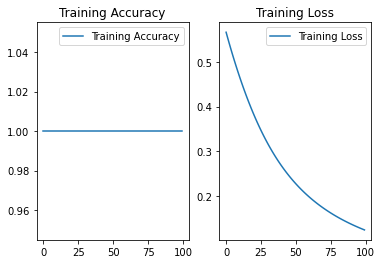

input the number of test alphabet:3
input test alphabet:abcd
abcd->e
input test alphabet:adec
adec->e
input test alphabet:edca
edca->b


In [5]:
#用RNN实现输入连续四个字母，预测下一个字母 （One hot 编码）
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
import os

input_word = "abcde"
w_to_id = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}  # 单词映射到数值id的词典
id_to_onehot = {0: [1., 0., 0., 0., 0.], 1: [0., 1., 0., 0., 0.], 2: [0., 0., 1., 0., 0.], 3: [0., 0., 0., 1., 0.],
                4: [0., 0., 0., 0., 1.]}  # id编码为one-hot

x_train = [
    [id_to_onehot[w_to_id['a']], id_to_onehot[w_to_id['b']], id_to_onehot[w_to_id['c']], id_to_onehot[w_to_id['d']]],
    [id_to_onehot[w_to_id['b']], id_to_onehot[w_to_id['c']], id_to_onehot[w_to_id['d']], id_to_onehot[w_to_id['e']]],
    [id_to_onehot[w_to_id['c']], id_to_onehot[w_to_id['d']], id_to_onehot[w_to_id['e']], id_to_onehot[w_to_id['a']]],
    [id_to_onehot[w_to_id['d']], id_to_onehot[w_to_id['e']], id_to_onehot[w_to_id['a']], id_to_onehot[w_to_id['b']]],
    [id_to_onehot[w_to_id['e']], id_to_onehot[w_to_id['a']], id_to_onehot[w_to_id['b']], id_to_onehot[w_to_id['c']]],
]
y_train = [w_to_id['e'], w_to_id['a'], w_to_id['b'], w_to_id['c'], w_to_id['d']]

np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)

# 使x_train符合SimpleRNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。
# 此处整个数据集送入，送入样本数为len(x_train)；输入4个字母出结果，循环核时间展开步数为4; 表示为独热码有5个输入特征，每个时间步输入特征个数为5
x_train = np.reshape(x_train, (len(x_train), 4, 5))
y_train = np.array(y_train)

model = tf.keras.Sequential([
    SimpleRNN(3),
    Dense(5, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/rnn_onehot_4pre1.ckpt"

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='loss')  # 由于fit没有给出测试集，不计算测试集准确率，根据loss，保存最优模型

history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[cp_callback])

model.summary()

# print(model.trainable_variables)
file = open('./weights.txt', 'w')  # 参数提取
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

############### predict #############

preNum = int(input("input the number of test alphabet:"))
for i in range(preNum):
    alphabet1 = input("input test alphabet:")
    alphabet = [id_to_onehot[w_to_id[a]] for a in alphabet1]
    # 使alphabet符合SimpleRNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。此处验证效果送入了1个样本，送入样本数为1；输入4个字母出结果，所以循环核时间展开步数为4; 表示为独热码有5个输入特征，每个时间步输入特征个数为5
    alphabet = np.reshape(alphabet, (1, 4, 5))
    result = model.predict([alphabet])
    pred = tf.argmax(result, axis=1)
    pred = int(pred)
    tf.print(alphabet1 + '->' + input_word[pred])